# Procesamiento de Imágenes Digitales

Visión Computacional 2018-19 <br>
Practica 1. 3
de octubre de 2018

Este enunciado está en el archivo "PracticaPI2018.ipynb" o su versión "pdf" que puedes encontrar en el Aula Virtual.

## Objetivos


Los objetivos de esta práctica son:
* Programar algunas de las rutinas de transformaciones puntuales de procesamiento de imágenes y analizar el resultado de su aplicación.
* Repasar algunos conceptos de filtrado de imágenes y programar algunas rutinas para suavizado y extracción de bordes.
* Implementar un algoritmo de segmentación de imágenes y otro de extracción de líneas mediante la transformada de Hough.

## Requerimientos

Para esta práctica es necesario disponer del siguiente software:
* Python 2.7 ó 3.X 
* Jupyter http://jupyter.org/.
* Los paquetes "pip" y  "PyMaxFlow"
* Las librerías científicas de Python: NumPy, SciPy, y Matplotlib.
* El paquete PyGame.
* La librería OpenCV.

Las versiones preferidas del entorno de trabajo puedes consultarlas en el Aula Virtual en el archivo "ConfiguracionPC2018.txt". 

El material necesario para la práctica se puede descargar del Aula Virtual.

## Condiciones

* La fecha límite de entrega será el martes 23 de octubre a las 23:55.
* La entrega consiste en dos archivos con el código, resultados y respuestas a los ejercicios:
  1. Un "notebook" de Jupyter con los resultados. Las respuestas a los ejercicios debes introducirlas en tantas celdas de código o texto como creas necesarias, insertadas inmediatamente después de  un enuciado y antes del siguiente.
  2. Un documento "pdf" generado a partir del fuente de Jupyter, por ejemplo usando el comando ``jupyter nbconvert --execute --to pdf notebook.ipynb``, o simplemente imprimiendo el "notebook" desde el navegador en la opción del menú "File->Print preview". Asegúrate de que el documento "pdf" contiene todos los resultados correctamente ejecutados.
* Esta práctica puede realizarse en parejas.

## Instala el entorno de trabajo

En la distribución Linux Ubuntu 18.04, éstos son los comandos necesarios para instalar el entorno:
1. Instala los paquetes Python y Jupyter

    ``apt install python
    apt install python-scipy
    apt install python-numpy
    apt install python-matplotlib
    apt install python-opencv
    apt install jupyter
    apt install jupyter-nbconvert``

    Para para trabajar con la versión 3.X de Python, basta sustituir la palabra "python" por "python3" en los comandos anteriores.

2. Instala el paquete PyMaxflow

   ``pip install PyMaxflow`` o ``pip3 install PyMaxflow``
   
   Si no tienes el paquete "pip" debes instalarlo: ``apt install python-pip`` o ``apt install python3-pip``
3. Instala el paquete "pygame"

    ``apt install python-pygame`` 
    
    Si deseas trabajar en Python 3.X, la versión 18.04 de Ubuntu no tiene el paquete "python3-pygame" pero puedes instalarlo con la herramienta pip: ``pip3 install pygame``

## Transformaciones puntuales

En este apartado te recomiendo que uses al menos la imagen indicada, que puedes encontrar en el directorio de imágenes
del aula virtual. También puedes probar con otras que te parezcan interesantes.

**Ejercicio 1.** Carga la imagen ``escilum.tif``. Calcula
y muestra su histograma, por ejemplo,  con la función ``hist()`` de
``matplotlib.pyplot``. A la vista del histograma, discute
qué problema tiene la imagen para analizar visualmente la
región inferior izquierda.

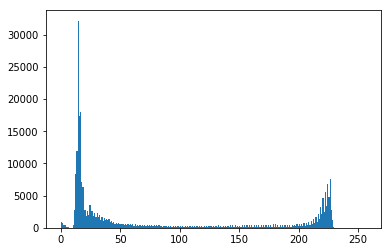

In [34]:
from imageio import imread
import numpy as np
from matplotlib.pyplot import hist, show

imgName='images/escilum.tif'

img = imread(imgName)

npimg = np.array(img)

bins = list(range(0,256+1))

histogram = hist(npimg.flatten(), bins=bins)

show() # We need to run this cell twice to show the plot. Why?

El problema que tiene es ... **TODO**

**Ejercicio 2.** Escribe una función ``eq_hist(histograma)``
que calcule la función de transformación puntual que ecualiza el histograma.
Aplica la función de transformación a la imagen anterior.
Calcula y muestra nuevamente el histograma y la imagen
resultantes, así como la función de transformación.

Discute los resultados obtenidos. ¿Cuál sería el resultado si volviésemos a ecualizar la imagen resultante?

En este ejercicio tienes que implementar la función que ecualiza el histograma. No puedes usar funciones que lo hagan por ti.

In [35]:
def eq_hist(histogram):

    values, _, _ = histogram

    cs = np.cumsum(values)

    f = [int(round(255*cs[i]/cs[255])) for i in range(256)]
    
    def lambd(j):
        return f[int(j)]
    
    return lambd

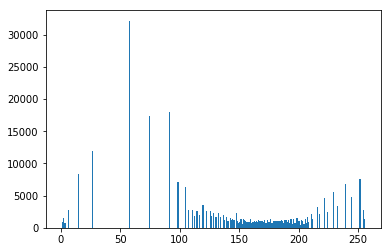

In [41]:
func = eq_hist(histogram)
eq_img = np.vectorize(func2)

imgeq = eq_img(npimg)

new_histogram = hist(imgeq.flatten(), bins=bins)

show()

<function matplotlib.pyplot.show>

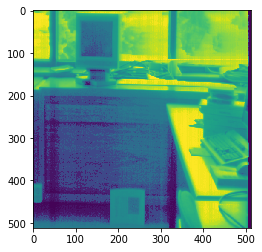

In [45]:
from matplotlib import pyplot as plt
plt.imshow(imgeq)
plt.show

Discusion: **TODO**

Resultado si se vuelve a equalizar: **TODO** (en teoría el mismo, pero tal vez al discretizar pueda haber variaciones mínimas)

##  Filtrado

Para realizar las convoluciones utiliza la función ``convolve`` o ``convolve1d`` de ``scipy.ndimage.filters``,
segun corresponda.


Carga y muestra las imágenes ``escgaus.bmp`` y ``escimp5.bmp`` que están contaminadas respectivamente
con ruido de tipo gaussiano e impulsional. En los siguientes ejercicios también puedes utilizar otras imágenes que te parezcan interesantes.

**Ejercicio 3.** Escribe una función ``masc_gaus(sigma, n)``
que construya una máscara de una dimensión de un filtro
gaussiano de tamaño *n* y varianza σ . Filtra las imágenes
anteriores con filtros bidimensionales de diferentes tamaños
de *n* , y/o σ.

En este ejercicio tienes que implementar la función que construye la máscara. No puedes usar funciones que construyan la máscara o realicen el filtrado automáticamente.

Muestra y discute los resultados. Pinta alguna de las máscaras construidas.



**Ejercicio 4.** Escribe una función ``masc_deriv_gaus(sigma, n)`` que construya una máscara de una dimensión de un
filtro derivada del gaussiano de tamaño *n* y varianza σ. Filtra la imagen ``corridor.jpg`` con filtros bidimensionales de derivada
del gaussiano para extraer los bordes de la imagen. Prueba con diferentes valores de *n* y/o σ.

Muestra y discute los resultados. Pinta alguna de las máscaras construidas.

**Ejercicio 5.** Compara los tiempos de ejecución de las convoluciones anteriores cuando se realizan con ``convolve1d`` en vez de con ``convolve``.
Analiza los tiempos para diferentes valores de *n* y justifica los resultados.

In [ ]:
# Posible ejemplo de código
import time

start_time = time.clock()
# ejecuta convoluciones ....

print time.clock() - start_time, "seconds"

**Ejercicio 6.** Aplica el filtro de la mediana a las imágenes
``escgaus.bmp`` y ``escimp5.bmp`` con diferentes valores de tamaño de la ventana. Muestra y discute los resultados. Compáralos con los obtenidos en el Ejercicio 3.

Para realizar este ejercicio puedes utilizar la función ``cv2.medianBlur()`` de OpenCV, ``scipy.ndimage.median_filter()`` de SciPy o hacer tu propia función. Para ello puedes escribir una función ``mediana(img, n)`` y aplicarla a la imagen con la función ``scipy.ndimage.filters()``.



**Ejercicio 7.** Utiliza la funcion ``cv2.bilateralFilter()`` de OpenCV para realizar el filtrado bilateral de una
imagen. Selecciona los parámetros adecuados y aplícalo a las imágenes ``escgaus.bmp`` y ``escimp5.bmp`` y otras que elijas tú.

Si llamamos $\sigma_r$ a la varianza de de la gaussiana que controla la ponderación debida a la diferencia entre los valores de los píxeles y $\sigma_s$ a la varianza de la gaussiana que controla la ponderación debida a la posición de los píxeles. Responde a la siguientes preguntas:
* ¿Cómo se comporta el filtro bilateral cuando la varianza $\sigma_r$ es muy alta? ¿En este caso qué ocurre si $\sigma_s$ es alta o baja?
* ¿Cómo se comporta si $\sigma_r$ es muy baja? ¿En este caso cómo se comporta el filtro dependiendo si $\sigma_s$ es alta o baja?

Muestra y discute los resultados para distintos valores de los parámetros y varias aplicaciones sucesivas del filtro. Compáralos con los obtenidos en los Ejercicios 3 y 6.

## Transformada Hough

**Ejercicio 8.** Emplea la transformada Hough para encontrar segmentos rectilíneos en la imagen ``corridor.jpg``. Para extraer los bordes de la imagen utiliza las funciones escritas en los ejercicios 3 y 4. Utiliza la función ``cv2.HoughLinesP()`` de OpenCV.

Discute el funcionamiento para distintos valores de los parámetros de la función, así como de
los filtros utilizados para extraer los bordes de la imagen. Pinta los resultados sobre la imagen (mira como ejemplo, https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html).

## Segmentación

**Ejercicio 9.** Escribe una función que segmente el objeto central de una imagen a partir de una segmentación manual
inicial realizada por el usuario. Puedes utilizar el código proporcionado en el archivo segm.py. En la optimización
1. toma como afinidad entre una pareja de píxeles la
diferencia en sus valores de color y;
2. sólo establece los términos unitarios de los píxeles
marcados por el usuario.

Aplícalo, al menos, a las imágenes ``persona.png`` y ``horse.jpg``. Muestra y discute los resultados.

In [119]:
#################################
# Segmentacion de imagen a la "Grab Cut" simplificado
# por Luis Baumela. UPM. 15-10-2015
# Vision por Computador. Master en Inteligencia Artificial
#################################

# Comentarios en español del fichero original
# Comments in english are new


import numpy as np
from imageio import imread
import maxflow
import matplotlib.pyplot as plt
import select_pixels as sel
from math import sqrt

def segmentation(img):

    img = imread(imgName)

    npimg = np.array(img) # not sure if necessary
    # Marco algunos pixeles que pertenecen el objeto y el fondo
    markedImg = sel.select_fg_bg(img)

    v,h = img.shape[0], img.shape[1]

    # Create the graph.
    g = maxflow.Graph[float]()

    # Add the nodes. nodeids has the identifiers of the nodes in the grid.
    nodeids = g.add_grid_nodes(img.shape[:2])

    # Calcula los costes de los nodos no terminales del grafo

    # Estos son los costes de los vecinos horizontales
    zeros_v = np.zeros(3*v).reshape(v,1,3)
    img_shift_h = np.concatenate((zeros_v,npimg[:,0:-1,:]),axis=1)
    aux_h = npimg-img_shift_h
    #exp_aff_h = 255 - 0.2989*aux_h[:,:,0] - 0.5870*aux_h[:,:,1] - 0.1140*aux_h[:,:,2]
    exp_aff_h = 255 - np.linalg.norm(aux_h,axis=2)/sqrt(3) # Is the norm the best for this
    #exp_aff_h = np.linalg.norm(aux_h,axis=2)# Is the norm the best for this

    
    # Estos son los costes de los vecinos verticales
    zeros_h = np.zeros(3*h).reshape(1,h,3)
    img_shift_v = np.concatenate((zeros_h,npimg[0:-1,:,:]),axis=0)
    aux_v = np.absolute(npimg-img_shift_v)
    #exp_aff_v = 255 - 0.2989*aux_v[:,:,0] - 0.5870*aux_v[:,:,1] - 0.1140*aux_v[:,:,2]
    exp_aff_v = 255 - np.linalg.norm(aux_v,axis=2)/sqrt(3)
    #exp_aff_v = np.linalg.norm(aux_v,axis=2)

    
    # What is the pythonic way to do what we do above?

    # Construyo el grafo 
    # Para construir el grafo relleno las estructuras
    hor_struc=np.array([[0, 0, 0],[1, 0, 0],[0, 0, 0]])
    ver_struc=np.array([[0, 1, 0],[0, 0, 0],[0, 0, 0]])
    # Construyo el grafo 
    g.add_grid_edges(nodeids, exp_aff_h, hor_struc,symmetric=True)
    g.add_grid_edges(nodeids, exp_aff_v, ver_struc,symmetric=True)

    # Leo los pixeles etiquetados
    # Los marcados en rojo representan el objeto
    #pts_fg = np.transpose(np.where(np.all(np.equal(markedImg,(255,0,0)),2)))
    # Los marcados en verde representan el fondo
    #pts_bg = np.transpose(np.where(np.all(np.equal(markedImg,(0,255,0)),2)))

    mask_fg = np.all(np.equal(markedImg,(255,0,0)),2)
    mask_bg = np.all(np.equal(markedImg,(0,255,0)),2)

    exp_source = np.zeros((v,h))
    exp_source[mask_fg]=np.inf

    exp_sink = np.zeros((v,h))
    exp_sink[mask_bg] = np.inf

    # Incluyo las conexiones a los nodos terminales
    # Pesos de los nodos terminales
    g.add_grid_tedges(nodeids, exp_sink, exp_source)

    # Find the maximum flow.
    g.maxflow()
    # Get the segments of the nodes in the grid.
    sgm = g.get_grid_segments(nodeids)

    # Muestro el resultado de la segmentacion
    plt.figure()
    plt.imshow(np.uint8(np.logical_not(sgm)),cmap='gray')
    plt.show()

    # Lo muestro junto con la imagen para ver el resultado
    plt.figure()
    wgs=(np.float_(np.logical_not(sgm))+0.3)/1.3

    # Replico los pesos para cada canal y ordeno los indices
    wgs=np.rollaxis(np.tile(wgs,(3,1,1)),0,3)
    plt.imshow(np.uint8(np.multiply(img,wgs)))
    plt.show()
    
    return markedImg

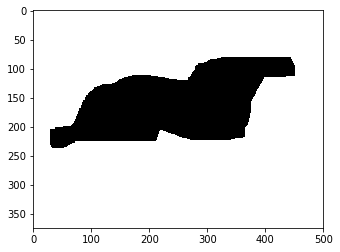

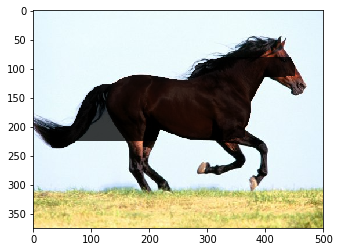

In [120]:
imgName='images/horse.jpg'

mark = segmentation(imgName)

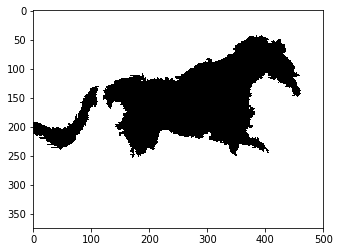

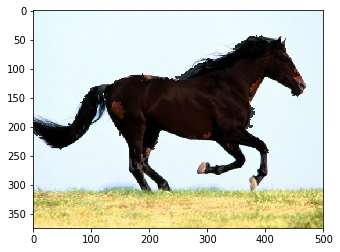

In [113]:
h1, v1 = segmentation2(imgName, mark)

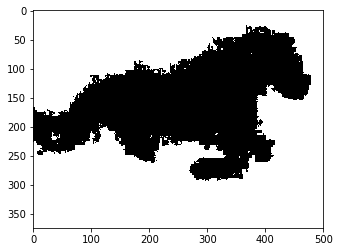

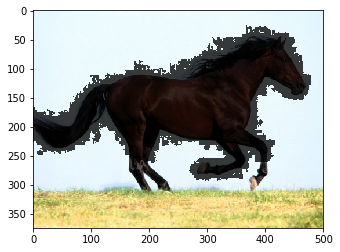

In [103]:
h2, v2 = segmentation3(imgName, mark)

In [104]:
h1.shape

(375, 500)

In [105]:
h2.shape

(375, 500)

In [106]:
v1.shape

(375, 500)

In [107]:
v2.shape

(375, 500)

In [108]:
h1

array([[420.67326989,   1.73205081,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [420.67326989,   1.73205081,   0.        , ..., 441.67295593,
        441.67295593,   0.        ],
       [420.67326989,   1.73205081,   0.        , ..., 441.67295593,
        441.67295593, 441.67295593],
       ...,
       [372.31304033,   9.48683298,  10.04987562, ...,   3.31662479,
         27.22131518,  31.17691454],
       [364.54492179,   3.60555128,   9.        , ..., 358.5094141 ,
         20.32240143,  25.98076211],
       [361.21323342,   2.23606798,   2.23606798, ..., 436.49284072,
         15.58845727,  24.24871131]])

In [109]:
h2

array([[420.67326989,   1.73205081,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [420.67326989,   1.73205081,   0.        , ...,   1.73205081,
          1.73205081,   0.        ],
       [420.67326989,   1.73205081,   0.        , ...,   1.73205081,
          1.73205081,   1.73205081],
       ...,
       [372.31304033,   9.48683298,  10.04987562, ...,   3.31662479,
         27.22131518,  31.17691454],
       [364.54492179,   3.60555128,   9.        , ...,   4.12310563,
         20.32240143,  25.98076211],
       [361.21323342,   2.23606798,   2.23606798, ...,   7.87400787,
         15.58845727,  24.24871131]])

In [111]:
imread(imgName)

Array([[[229, 246, 253],
        [230, 247, 254],
        [230, 247, 254],
        ...,
        [224, 242, 252],
        [224, 242, 252],
        [224, 242, 252]],

       [[229, 246, 253],
        [230, 247, 254],
        [230, 247, 254],
        ...,
        [225, 243, 253],
        [224, 242, 252],
        [224, 242, 252]],

       [[229, 246, 253],
        [230, 247, 254],
        [230, 247, 254],
        ...,
        [226, 244, 254],
        [225, 243, 253],
        [224, 242, 252]],

       ...,

       [[249, 230, 154],
        [254, 234, 161],
        [255, 240, 169],
        ...,
        [157, 154,  59],
        [171, 171,  75],
        [189, 189,  93]],

       [[246, 224, 149],
        [246, 227, 151],
        [252, 230, 157],
        ...,
        [166, 163,  68],
        [176, 176,  80],
        [191, 191,  95]],

       [[245, 221, 147],
        [245, 223, 148],
        [247, 223, 149],
        ...,
        [180, 177,  82],
        [189, 186,  91],
        [203, 200, 105]]

In [ ]:
#imgName='images/persona.png'

#segmentation(imgName)

Los resultados no son buenos, principalmente debido a que la función de afinidad no es buena. Como no tenemos en cuenta el coste de clasificar dos pixeles adyacentes en la misma clase, lo único que importa para determinar el fondo y la figura principal es minimizar el coste de clasificar dos pixeles en diferentes clases a lo largo del borde. Pero en esa minimización, el perímetro de ese borde juega un papel importante (cuanto mayor, mayor coste) y al final se tiende a minimizar ese perímetro en lugar de minimizar el coste en cada punto del borde. Eso explica la tendencia a que haya bordes rectilíneos, y que si se se usan puntos en la segmentación manual en lugar de lineas o curvas cerradas, esos puntos se queden aislados en la clasificación

**Ejercicio 10.** Mejora el algoritmo anterior. Puedes utilizar algunas de las que te sugiero a continuación u otras que creas más convenientes:
* Refina la segmentación iterativamente.
* Mejora la función de afinidad entre píxeles.
* Mejora los términos unitarios

mejora los resultados de algunas de las imágenes anteriores. Muestra y discute los resultados.

Una primera mejora podría ser introducir un coste al clasificar dos pixeles adyacentes en la misma clase. Pero entonces se tiene que cumplir la desigualdad Vij(0,0)+Vij(1,1) <= Vij(0,1)+Vij(1,0) para poder plantear el problema de optimización como un problema de flujo máximo, y no podemos usar costes altos cuando cuando Vij(0,1) y Vij(1,0) son bajos, que es pricisamente lo que interesaría.

Además, adaptar el grafo de flujo para que refleje esos costes no es sencillo. Si Vij(0,0)=Vij(1,1)=Kij es más fácil, ya que se pueden añadir aristas de xi a xj y de xj a xi con capacidad -Kij, de forma que si el corte no separa los dos nodos se deja de restar esa cantidad, lo cual es equvalente a que ése sea el coste de no separarlos. Por supuesto, las aristas no pueden tener capacidad negativa, así que lo que en realidad lo que haríamos sería restar esas capacidades a las capacidades originales y asegurarnos que el resultado es positivo. Eso impondría la restricción Kij <= Vij(1,0), Kij <= Vij(0,1), algo más fuerte que la anterior. En el caso general habría que modificar las capacidades de las aristas que conectan los nodos con la fuente y el sumidero, usando expresiones más complejas

Por ambas razones abandonaremos esta idea, e intentaremos mejorar en su lugar los costes Vij(1,0), Vij(0,1), y los términos unitarios

diagonals, bigger grid with more weight to closer pixels, v(1,1) y v(0,0), ...

In [112]:
#################################
# Segmentacion de imagen a la "Grab Cut" simplificado
# por Luis Baumela. UPM. 15-10-2015
# Vision por Computador. Master en Inteligencia Artificial
#################################

# Comentarios en español del fichero original
# Comments in english are new


import numpy as np
from imageio import imread
import maxflow
import matplotlib.pyplot as plt
import select_pixels as sel
from math import sqrt

def segmentation2(img, markedImg):

    img = imread(imgName)

    npimg = np.array(img) # not sure if necessary
    # Marco algunos pixeles que pertenecen el objeto y el fondo

    v,h = img.shape[0], img.shape[1]

    # Create the graph.
    g = maxflow.Graph[float]()

    # Add the nodes. nodeids has the identifiers of the nodes in the grid.
    nodeids = g.add_grid_nodes(img.shape[:2])

    # Calcula los costes de los nodos no terminales del grafo

    exp_aff_h = np.zeros((img.shape[0], img.shape[1]))

    for i in range(0, img.shape[1]):
        exp_aff_h[0][i] = np.exp(-(np.linalg.norm(img[0][i])))

    for i in range(1, img.shape[0]):
        for j in range(0, img.shape[1]):
            exp_aff_h[i][j] = np.exp(-(np.linalg.norm(img[i][j]-img[i-1][j])))


    # Estos son los costes de los vecinos verticales
    exp_aff_v =np.zeros((img.shape[0], img.shape[1]))

    for i in range(0, img.shape[0]):
        exp_aff_v[i][0] = np.exp(-(np.linalg.norm(img[i][0])))

    for i in range(0, img.shape[0]):
        for j in range(1, img.shape[1]):
            exp_aff_v[i][j] = np.exp(-(np.linalg.norm(img[i][j]- img[i][j-1])))

    # Construyo el grafo 
    # Para construir el grafo relleno las estructuras
    hor_struc=np.array([[0, 0, 0],[1, 0, 0],[0, 0, 0]])
    ver_struc=np.array([[0, 1, 0],[0, 0, 0],[0, 0, 0]])
    # Construyo el grafo 
    g.add_grid_edges(nodeids, exp_aff_h, hor_struc,symmetric=True)
    g.add_grid_edges(nodeids, exp_aff_v, ver_struc,symmetric=True)

    # Leo los pixeles etiquetados
    # Los marcados en rojo representan el objeto
    #pts_fg = np.transpose(np.where(np.all(np.equal(markedImg,(255,0,0)),2)))
    # Los marcados en verde representan el fondo
    #pts_bg = np.transpose(np.where(np.all(np.equal(markedImg,(0,255,0)),2)))

    mask_fg = np.all(np.equal(markedImg,(255,0,0)),2)
    mask_bg = np.all(np.equal(markedImg,(0,255,0)),2)

    exp_source = np.zeros((v,h))
    exp_source[mask_fg]=np.inf

    exp_sink = np.zeros((v,h))
    exp_sink[mask_bg] = np.inf

    # Incluyo las conexiones a los nodos terminales
    # Pesos de los nodos terminales
    g.add_grid_tedges(nodeids, exp_sink, exp_source)

    # Find the maximum flow.
    g.maxflow()
    # Get the segments of the nodes in the grid.
    sgm = g.get_grid_segments(nodeids)

    # Muestro el resultado de la segmentacion
    plt.figure()
    plt.imshow(np.uint8(np.logical_not(sgm)),cmap='gray')
    plt.show()

    # Lo muestro junto con la imagen para ver el resultado
    plt.figure()
    wgs=(np.float_(np.logical_not(sgm))+0.3)/1.3

    # Replico los pesos para cada canal y ordeno los indices
    wgs=np.rollaxis(np.tile(wgs,(3,1,1)),0,3)
    plt.imshow(np.uint8(np.multiply(img,wgs)))
    plt.show()
    
    return exp_aff_h, exp_aff_v

In [93]:
#################################
# Segmentacion de imagen a la "Grab Cut" simplificado
# por Luis Baumela. UPM. 15-10-2015
# Vision por Computador. Master en Inteligencia Artificial
#################################

# Comentarios en español del fichero original
# Comments in english are new


import numpy as np
from imageio import imread
import maxflow
import matplotlib.pyplot as plt
import select_pixels as sel
from math import sqrt

def segmentation3(img, markedImg):

    img = imread(imgName)

    npimg = np.array(img) # not sure if necessary
    # Marco algunos pixeles que pertenecen el objeto y el fondo

    v,h = img.shape[0], img.shape[1]

    # Create the graph.
    g = maxflow.Graph[float]()

    # Add the nodes. nodeids has the identifiers of the nodes in the grid.
    nodeids = g.add_grid_nodes(img.shape[:2])

    # Calcula los costes de los nodos no terminales del grafo

    # Estos son los costes de los vecinos horizontales
    zeros_v = np.zeros(3*v).reshape(v,1,3)
    img_shift_h = np.concatenate((zeros_v,npimg[:,0:-1,:]),axis=1)
    aux_h = npimg-img_shift_h
    #exp_aff_h = 255 - 0.2989*aux_h[:,:,0] - 0.5870*aux_h[:,:,1] - 0.1140*aux_h[:,:,2]
    exp_aff_h = np.linalg.norm(aux_h,axis=2) # Is the norm the best for this

    # Estos son los costes de los vecinos verticales
    zeros_h = np.zeros(3*h).reshape(1,h,3)
    img_shift_v = np.concatenate((zeros_h,npimg[0:-1,:,:]),axis=0)
    aux_v = np.absolute(npimg-img_shift_v)
    #exp_aff_v = 255 - 0.2989*aux_v[:,:,0] - 0.5870*aux_v[:,:,1] - 0.1140*aux_v[:,:,2]
    exp_aff_v = np.linalg.norm(aux_v,axis=2)

    # What is the pythonic way to do what we do above?

    # Construyo el grafo 
    # Para construir el grafo relleno las estructuras
    hor_struc=np.array([[0, 0, 0],[1, 0, 0],[0, 0, 0]])
    ver_struc=np.array([[0, 1, 0],[0, 0, 0],[0, 0, 0]])
    # Construyo el grafo 
    g.add_grid_edges(nodeids, exp_aff_h, hor_struc,symmetric=True)
    g.add_grid_edges(nodeids, exp_aff_v, ver_struc,symmetric=True)

    # Leo los pixeles etiquetados
    # Los marcados en rojo representan el objeto
    #pts_fg = np.transpose(np.where(np.all(np.equal(markedImg,(255,0,0)),2)))
    # Los marcados en verde representan el fondo
    #pts_bg = np.transpose(np.where(np.all(np.equal(markedImg,(0,255,0)),2)))

    mask_fg = np.all(np.equal(markedImg,(255,0,0)),2)
    mask_bg = np.all(np.equal(markedImg,(0,255,0)),2)

    exp_source = np.zeros((v,h))
    exp_source[mask_fg]=np.inf

    exp_sink = np.zeros((v,h))
    exp_sink[mask_bg] = np.inf

    # Incluyo las conexiones a los nodos terminales
    # Pesos de los nodos terminales
    g.add_grid_tedges(nodeids, exp_sink, exp_source)

    # Find the maximum flow.
    g.maxflow()
    # Get the segments of the nodes in the grid.
    sgm = g.get_grid_segments(nodeids)

    # Muestro el resultado de la segmentacion
    plt.figure()
    plt.imshow(np.uint8(np.logical_not(sgm)),cmap='gray')
    plt.show()

    # Lo muestro junto con la imagen para ver el resultado
    plt.figure()
    wgs=(np.float_(np.logical_not(sgm))+0.3)/1.3

    # Replico los pesos para cada canal y ordeno los indices
    wgs=np.rollaxis(np.tile(wgs,(3,1,1)),0,3)
    plt.imshow(np.uint8(np.multiply(img,wgs)))
    plt.show()
    
    return exp_aff_h, exp_aff_v

In [42]:
import numpy as np
from math import sqrt
img = np.random.rand(4,4,3)

In [55]:
    exp_aff_h =np.zeros((img.shape[0], img.shape[1]))

    for i in range(0, img.shape[0]):
        exp_aff_h[i][0] = 255 - np.linalg.norm(img[i][0])/sqrt(3)

    for i in range(0, img.shape[0]):
        for j in range(1, img.shape[1]):
            exp_aff_h[i][j] = 255 - np.linalg.norm(img[i][j]- img[i][j-1])/sqrt(3)
            
    # Calcula los costes de los nodos no terminales del grafo
    exp_aff_v = np.zeros((img.shape[0], img.shape[1]))
    
    for i in range(0, img.shape[1]):
        exp_aff_v[0][i] = 255 - np.linalg.norm(img[0][i])/sqrt(3)

    for i in range(1, img.shape[0]):
        for j in range(0, img.shape[1]):
            exp_aff_v[i][j] = 255 - np.linalg.norm(img[i][j]- img[i-1][j])/sqrt(3)

In [56]:
    # Estos son los costes de los vecinos horizontales
    zeros_v = np.zeros(3*4).reshape(4,1,3)
    img_shift_h = np.concatenate((zeros_v,img[:,0:-1,:]),axis=1)
    aux_h = img-img_shift_h
    #exp_aff_h = 255 - 0.2989*aux_h[:,:,0] - 0.5870*aux_h[:,:,1] - 0.1140*aux_h[:,:,2]
    exp_aff_h2 = 255 - np.linalg.norm(aux_h,axis=2)/sqrt(3) # Is the norm the best for this

    # Estos son los costes de los vecinos verticales
    zeros_h = np.zeros(3*4).reshape(1,4,3)
    img_shift_v = np.concatenate((zeros_h,img[0:-1,:,:]),axis=0)
    aux_v = np.absolute(img-img_shift_v)
    #exp_aff_v = 255 - 0.2989*aux_v[:,:,0] - 0.5870*aux_v[:,:,1] - 0.1140*aux_v[:,:,2]
    exp_aff_v2 = 255 - np.linalg.norm(aux_v,axis=2)/sqrt(3)

In [57]:
exp_aff_h

array([[254.23740253, 254.56118622, 254.5279273 , 254.4909027 ],
       [254.28494554, 254.63217983, 254.54223558, 254.58528114],
       [254.17848838, 254.75882056, 254.73443847, 254.73341366],
       [254.61628575, 254.88195373, 254.68139982, 254.58166428]])

In [58]:
exp_aff_h2

array([[254.23740253, 254.56118622, 254.5279273 , 254.4909027 ],
       [254.28494554, 254.63217983, 254.54223558, 254.58528114],
       [254.17848838, 254.75882056, 254.73443847, 254.73341366],
       [254.61628575, 254.88195373, 254.68139982, 254.58166428]])

In [59]:
exp_aff_v

array([[254.23740253, 254.5424891 , 254.35858408, 254.44091353],
       [254.84520621, 254.76299   , 254.63179938, 254.77489372],
       [254.69622598, 254.53422245, 254.74336513, 254.68620927],
       [254.46835799, 254.58339552, 254.79528668, 254.62696809]])

In [60]:
exp_aff_v2

array([[254.23740253, 254.5424891 , 254.35858408, 254.44091353],
       [254.84520621, 254.76299   , 254.63179938, 254.77489372],
       [254.69622598, 254.53422245, 254.74336513, 254.68620927],
       [254.46835799, 254.58339552, 254.79528668, 254.62696809]])

In [26]:
exp_aff_h/sqrt(3)

array([[0.55020669, 0.46857435, 0.47797874, 0.20794341],
       [0.72468122, 0.457656  , 0.45382783, 0.14193587],
       [0.38165501, 0.47735979, 0.50622747, 0.38962403],
       [0.70490179, 0.58767811, 0.40547272, 0.1769885 ]])

In [27]:
exp_aff_h2/sqrt(3)

array([[0.55020669, 0.46857435, 0.47797874, 0.20794341],
       [0.72468122, 0.457656  , 0.45382783, 0.14193587],
       [0.38165501, 0.47735979, 0.50622747, 0.38962403],
       [0.70490179, 0.58767811, 0.40547272, 0.1769885 ]])